In [41]:
#  Импортируем библиотеки
import numpy as np
import pandas as pd

from sklearn.metrics import *

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.svm import LinearSVR
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import GradientBoostingRegressor, \
                             RandomForestRegressor, \
                             BaggingRegressor

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Отображаем все столбцы в датасете
pd.set_option("display.max_columns", None )

In [43]:
# Загружаем датасет
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
# достаем target из train
#target1 = df_train['SalePrice'].to_numpy()
target = df_train['SalePrice'].to_numpy()
target = np.log(target)
# дропаем target из train
df_train.drop('SalePrice', axis=1, inplace=True)
# Соединяем train и test
df_all = pd.concat([df_train, df_test], sort= True)
df = df_all.copy()

In [44]:
# дропаем колонки с NaN > 80%
df.drop(['MiscFeature','Alley','Fence','Neighborhood'], axis = 1, inplace=True)

In [45]:
# Проверяем количество NaN
# temp=pd.DataFrame(df.isna().sum(),columns=(['number']))
# temp2=temp[temp['number']>0]                
# temp2.sort_values(['number'],ascending=False)

In [46]:
# заполняем NaN
df['GarageCond'] = df['GarageCond'].fillna('Ng')
df['GarageQual'] = df['GarageQual'].fillna('Ng')
df['GarageFinish'] = df['GarageFinish'].fillna('Ng')
df['FireplaceQu'] = df['FireplaceQu'].fillna('Nf')
df['Functional'] = df['Functional'].fillna('Sal')
df['PoolQC'] = df['PoolQC'].fillna('Np')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(2005.0)
df['GarageType'] = df['GarageType'].fillna('Ng')
df['BsmtCond'] = df['BsmtCond'].fillna('Nb')
df['BsmtQual'] = df['BsmtQual'].fillna('Nb')
df['BsmtExposure'] = df['BsmtExposure'].fillna('Nb')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('Nb')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('Nb')
df['MasVnrType'] = df['BsmtFinType1'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['KitchenQual'] = df['KitchenQual'].fillna('Fa')
df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['Utilities'] = df['Utilities'].fillna('ELO')
df['MSZoning'] = df['MSZoning'].fillna('RL')
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(df['BsmtFullBath'].median())
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GarageArea','SaleType','TotalBsmtSF']] = \
df[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GarageArea','SaleType','TotalBsmtSF']].fillna(0)
df['GarageCars'] = df['GarageCars'].fillna(df['GarageCars'].median())
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode().to_numpy()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode().to_numpy()[0])
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

## Label encoding

In [47]:
Pool_QC = ['Np','Fa','Gd','Ex']
encoder = OrdinalEncoder(categories = [Pool_QC])
df['PoolQC'] = encoder.fit_transform(df[['PoolQC']])

Paved_Drive = ['P','N','Y']
encoder = OrdinalEncoder(categories = [Paved_Drive])
df['PavedDrive'] = encoder.fit_transform(df[['PavedDrive']])

Garage_Cond = ['Ng','Po','Fa','TA','Gd','Ex']
encoder = OrdinalEncoder(categories = [Garage_Cond])
df['GarageCond'] = encoder.fit_transform(df[['GarageCond']])

Garage_Qual = ['Ng','Po','Fa','TA','Gd','Ex']
encoder = OrdinalEncoder(categories = [Garage_Qual])
df['GarageQual'] = encoder.fit_transform(df[['GarageQual']])

Garage_Finish = ['Ng','Unf','RFn','Fin']
encoder = OrdinalEncoder(categories = [Garage_Finish])
df['GarageFinish'] = encoder.fit_transform(df[['GarageFinish']])

Fire_placeQu = ['Nf','Po','Fa','TA','Gd','Ex']
encoder = OrdinalEncoder(categories = [Fire_placeQu])
df['FireplaceQu'] = encoder.fit_transform(df[['FireplaceQu']])

Functional = ['Sal','Sev','Maj2','Maj1','Mod','Min1','Min2','Typ']
encoder = OrdinalEncoder(categories = [Functional])
df['Functional'] = encoder.fit_transform(df[['Functional']])

Garage_Type = ['Ng','Detchd','CarPort','BuiltIn','Basment','Attchd','2Types']
encoder = OrdinalEncoder(categories = [Garage_Type])
df['GarageType'] = encoder.fit_transform(df[['GarageType']])

Bsmt_Cond = ['Nb','Po','Fa','TA','Gd']
encoder = OrdinalEncoder(categories = [Bsmt_Cond])
df['BsmtCond'] = encoder.fit_transform(df[['BsmtCond']])

Bsmt_Exposure = ['Nb','No','Mn','Av','Gd']
encoder = OrdinalEncoder(categories = [Bsmt_Exposure])
df['BsmtExposure'] = encoder.fit_transform(df[['BsmtExposure']])

Bsmt_Qual = ['Nb','Fa','TA','Gd','Ex']
encoder = OrdinalEncoder(categories = [Bsmt_Qual])
df['BsmtQual'] = encoder.fit_transform(df[['BsmtQual']])

Bsmt_Fin_Type2 = ['Nb','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
encoder = OrdinalEncoder(categories = [Bsmt_Fin_Type2])
df['BsmtFinType2'] = encoder.fit_transform(df[['BsmtFinType2']])

Bsmt_Fin_Type1 = ['Nb','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
encoder = OrdinalEncoder(categories = [Bsmt_Fin_Type1])
df['BsmtFinType1'] = encoder.fit_transform(df[['BsmtFinType1']])

exter_cond_order = ['Po','Fa', 'TA', 'Gd', 'Ex']
encoder = OrdinalEncoder(categories = [exter_cond_order])
df['ExterCond'] = encoder.fit_transform(df[['ExterCond']])

kitchenqual_order = ['Fa', 'Ex', 'Gd', 'TA']
encoder2 = OrdinalEncoder(categories = [kitchenqual_order])
df['KitchenQual'] = encoder.fit_transform(df[['KitchenQual']])

MasVnr_Type = ['Nb','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
encoder = OrdinalEncoder(categories = [MasVnr_Type])
df['MasVnrType'] = encoder.fit_transform(df[['MasVnrType']])

exterqual_order = ['Po','Fa', 'TA', 'Gd', 'Ex']
encoder = OrdinalEncoder(categories = [exterqual_order])
df['ExterQual'] = encoder.fit_transform(df[['ExterQual']])

mszoning_order = ['RM', 'RL', 'RH', 'FV','C (all)']
encoder3 = OrdinalEncoder(categories = [mszoning_order])
df['MSZoning'] = encoder3.fit_transform(df[['MSZoning']])

HeatingQC = ['Po','Fa','TA','Gd','Ex']
encoder20 = OrdinalEncoder(categories = [HeatingQC])
df_all['HeatingQC'] = encoder20.fit_transform(df_all[['HeatingQC']])

HeatingQC = ['Po','Fa','TA','Gd','Ex']
encoder20 = OrdinalEncoder(categories = [HeatingQC])
df['HeatingQC'] = encoder20.fit_transform(df[['HeatingQC']])

In [48]:
encoder = OrdinalEncoder()
df['BldgType'] = encoder.fit_transform(df[['BldgType']])

encoder = OrdinalEncoder()
df['Condition1'] = encoder.fit_transform(df[['Condition1']])

encoder = OrdinalEncoder()
df['Condition2'] = encoder.fit_transform(df[['Condition2']])

encoder = OrdinalEncoder()
df['Electrical'] = encoder.fit_transform(df[['Electrical']])

encoder = OrdinalEncoder()
df['Exterior1st'] = encoder.fit_transform(df[['BldgType']])

encoder = OrdinalEncoder()
df['Exterior2nd'] = encoder.fit_transform(df[['BldgType']])

encoder = OrdinalEncoder()
df['Foundation'] = encoder.fit_transform(df[['Foundation']])

encoder = OrdinalEncoder()
df['Heating'] = encoder.fit_transform(df[['Heating']])

encoder = OrdinalEncoder()
df['RoofMatl'] = encoder.fit_transform(df[['RoofMatl']])

encoder = OrdinalEncoder()
df['RoofMatl'] = encoder.fit_transform(df[['RoofMatl']])

encoder = OrdinalEncoder()
df['RoofStyle'] = encoder.fit_transform(df[['RoofStyle']])

encoder = OrdinalEncoder()
df['SaleCondition'] = encoder.fit_transform(df[['SaleCondition']])

df['SaleType'] = np.where((df['SaleType'] == 0), 'WD', df['SaleType'])
encoder = OrdinalEncoder()
df['SaleType'] = encoder.fit_transform(df[['SaleType']])

encoder = OrdinalEncoder()
df['LotConfig'] = encoder.fit_transform(df[['LotConfig']])

## One Hot Encoding

In [49]:
df = pd.get_dummies(data = df, columns=['CentralAir'])
df = pd.get_dummies(data = df, columns=['HouseStyle'])
df = pd.get_dummies(data = df, columns=['LandContour'])
df = pd.get_dummies(data = df, columns=['LotShape'])
df = pd.get_dummies(data = df, columns=['Street'])
df = pd.get_dummies(data = df, columns=['Utilities'])
df = pd.get_dummies(data = df, columns=['LandSlope'])

## Гистограммы columns с числовыми признаками

In [50]:
# сздаем датасет с числовыми признаками
numeric_features = df_all.select_dtypes(exclude='object').columns

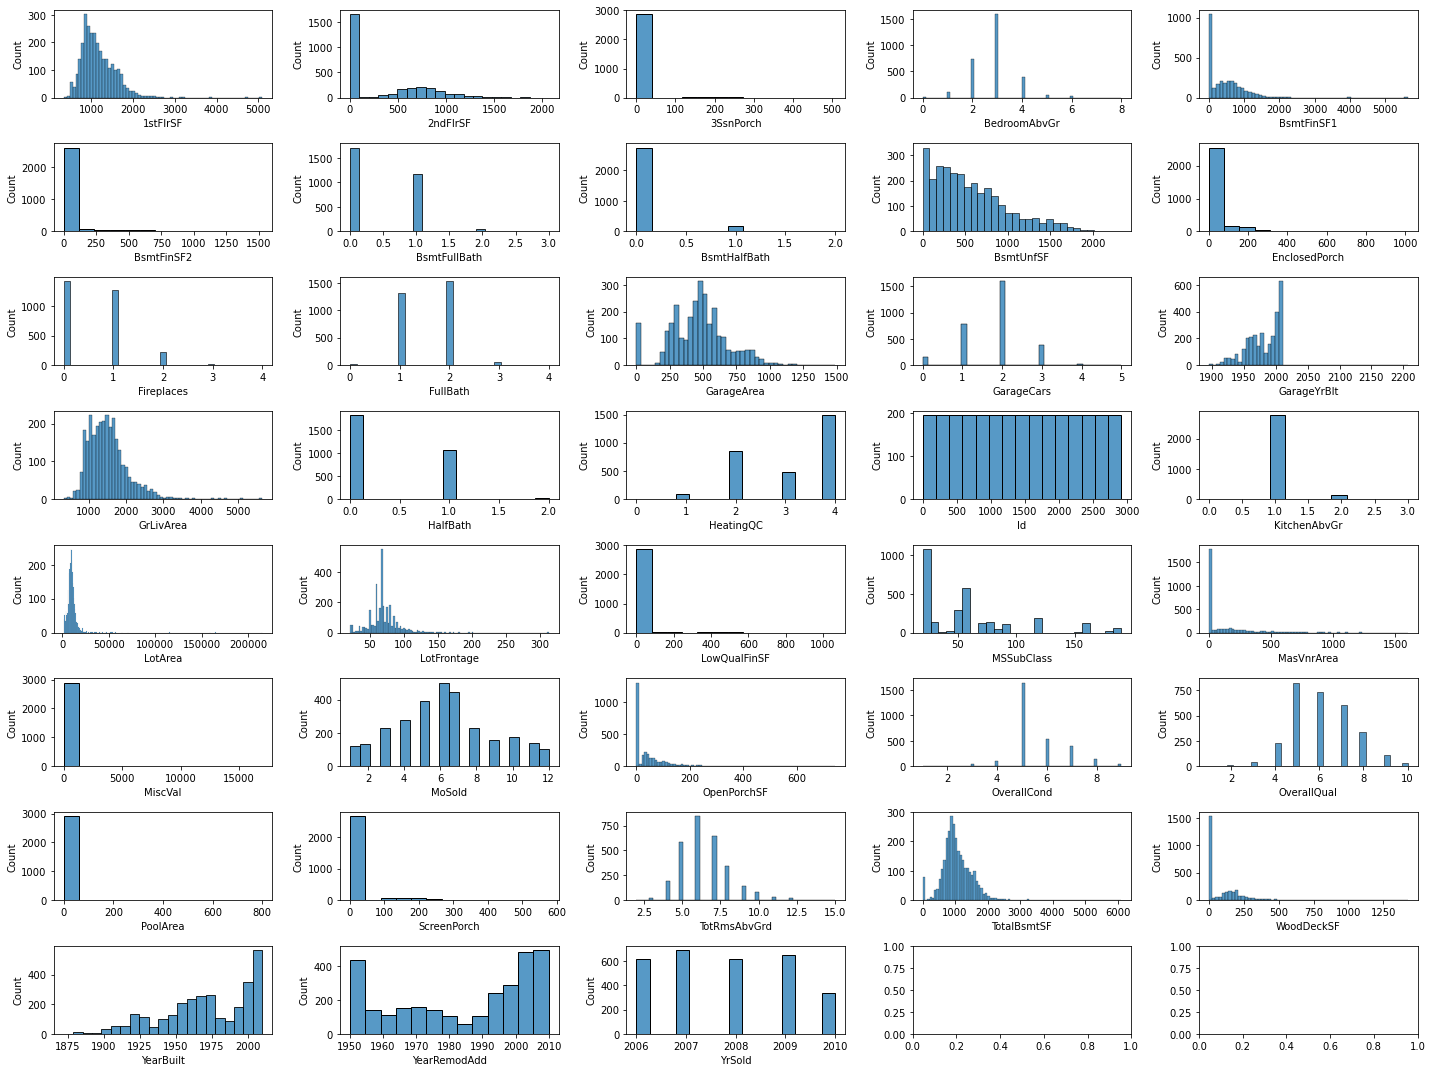

In [51]:
# визуализируем
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(20,15))
for i in range(8):
    for j in range(5):
        if 5 * i + j == 38:
            break
        sns.histplot(df[numeric_features[5 * i + j]], ax = axes[i,j])
plt.tight_layout()

## Чистим выбросы и применяем логарифмирование к нормальным распределениям!

## Разбиваем датасет на train и test

In [86]:
df_train=df.iloc[:1460]


#df_train['target1'] = target1

#df_train.to_csv('/Users/mike/Desktop/main/Project/dataset_new.csv')

X_train, X_valid, y_train, y_valid = train_test_split(df_train, target, random_state=23, test_size=0.2)



,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,Id,KitchenAbvGr,KitchenQual,LotArea,LotConfig,LotFrontage,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,CentralAir_N,CentralAir_Y,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_ELO,Utilities_NoSeWa,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,target1
0,856,854,0,3,0.0,3.0,1.0,706.0,0.0,6.0,1.0,1.0,0.0,3.0,150.0,2.0,2.0,4.0,0,2.0,3.0,0.0,0.0,0.0,0,2.0,2,7.0,548.0,2.0,3.0,2.0,3.0,5.0,2003.0,1710,1,1.0,4.0,1,1,3.0,8450,4.0,65.0,0,60,1.0,196.0,6.0,0,2,61,5,7,2.0,0,0.0,1.0,1.0,4.0,8.0,0,8,856.0,0,2003,2003,2008,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,208500
1,1262,0,0,3,0.0,3.0,4.0,978.0,0.0,5.0,1.0,0.0,1.0,3.0,284.0,1.0,2.0,4.0,0,2.0,2.0,0.0,0.0,3.0,1,1.0,2,7.0,460.0,2.0,3.0,2.0,3.0,5.0,1976.0,1262,0,1.0,4.0,2,1,2.0,9600,2.0,80.0,0,20,1.0,0.0,5.0,0,5,0,8,6,2.0,0,0.0,1.0,1.0,4.0,8.0,0,6,1262.0,298,1976,1976,2007,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,181500
2,920,866,0,3,0.0,3.0,2.0,486.0,0.0,6.0,1.0,1.0,0.0,3.0,434.0,2.0,2.0,4.0,0,2.0,3.0,0.0,0.0,3.0,1,2.0,2,7.0,608.0,2.0,3.0,2.0,3.0,5.0,2001.0,1786,1,1.0,4.0,3,1,3.0,11250,4.0,68.0,0,60,1.0,162.0,6.0,0,9,42,5,7,2.0,0,0.0,1.0,1.0,4.0,8.0,0,6,920.0,0,2001,2002,2008,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,223500
3,961,756,0,3,0.0,4.0,1.0,216.0,0.0,5.0,1.0,1.0,0.0,2.0,540.0,2.0,2.0,4.0,272,2.0,2.0,0.0,0.0,4.0,1,0.0,1,7.0,642.0,3.0,3.0,1.0,3.0,1.0,1998.0,1717,0,1.0,3.0,4,1,3.0,9550,0.0,60.0,0,70,1.0,0.0,5.0,0,2,35,5,7,2.0,0,0.0,1.0,1.0,0.0,8.0,0,7,756.0,0,1915,1970,2006,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,140000
4,1145,1053,0,4,0.0,3.0,3.0,655.0,0.0,6.0,1.0,1.0,0.0,3.0,490.0,2.0,2.0,4.0,0,2.0,3.0,0.0,0.0,3.0,1,2.0,2,7.0,836.0,3.0,3.0,2.0,3.0,5.0,2000.0,2198,1,1.0,4.0,5,1,3.0,14260,2.0,84.0,0,60,1.0,350.0,6.0,0,12,84,5,8,2.0,0,0.0,1.0,1.0,4.0,8.0,0,9,1145.0,192,2000,2000,2008,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,3,0.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,953.0,2.0,2.0,4.0,0,2.0,2.0,0.0,0.0,3.0,1,2.0,2,7.0,460.0,2.0,3.0,2.0,3.0,5.0,1999.0,1647,1,1.0,4.0,1456,1,2.0,7917,4.0,62.0,0,60,1.0,0.0,1.0,0,8,40,5,6,2.0,0,0.0,1.0,1.0,4.0,8.0,0,7,953.0,0,1999,2000,2007,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,175000
1456,2073,0,0,3,0.0,3.0,1.0,790.0,163.0,5.0,3.0,1.0,0.0,3.0,589.0,2.0,2.0,4.0,0,2.0,2.0,0.0,0.0,3.0,2,1.0,2,5.0,500.0,2.0,3.0,1.0,3.0,5.0,1978.0,2073,0,1.0,2.0,1457,1,2.0,13175,4.0,85.0,0,20,1.0,119.0,5.0,0,2,0,6,6,2.0,0,0.0,1.0,1.0,4.0,8.0,0,7,1542.0,349,1978,1988,2010,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,210000
1457,1188,1152,0,4,0.0,4.0,1.0,275.0,0.0,6.0,1.0,0.0,0.0,2.0,877.0,2.0,2.0,4.0,0,3.0,4.0,0.0,0.0,4.0,2,4.0,2,7.0,252.0,1.0,3.0,2.0,3.0,5.0,1941.0,2340,0,1.0,4.0,1458,1,3.0,9042,4.0,66.0,0,70,1.0,0.0,6.0,2500,

# Учим модели

## KNeighborsRegressor

In [53]:
# Создаем объект классификатора с заданными параметрами
clf = KNeighborsRegressor(n_neighbors=5, p=1, algorithm = 'auto')
#clr = RadiusNeighborsClassifier(radius=10, weights='distance')
# Обучаем классификатор на обучающей части выборки
clf.fit(X_train, y_train.ravel())
# Делаем предсказания на обучающей части
y_pred_train = clf.predict(X_train)
# Делаем предсказания на валидационной части
y_pred_valid = clf.predict(X_valid)
# Вычисляем и распечатываем метрику на обучающей части 
print("train acc:", np.sqrt(mean_squared_error(y_pred_train, y_train)))
# Вычисляем и распечатываем метрику на валидационной части 
print("test acc:", np.sqrt(mean_squared_error(y_pred_valid, y_valid)))

train acc: 0.16804838740802874
test acc: 0.21680236725695717


## RandomForestRegressor

In [54]:
clf1 = RandomForestRegressor(n_estimators=500, max_depth=3, min_samples_split = 10)
clf1.fit(X_train, y_train.ravel())
print("train acc:", np.sqrt(mean_squared_error(y_pred_train, y_train)))
print("test acc:", np.sqrt(mean_squared_error(y_pred_valid, y_valid)))

train acc: 0.16804838740802874
test acc: 0.21680236725695717


## Prediction

In [55]:
# сохраняем в csv файл
predict_test = np.exp(clf.predict(df.iloc[1460:]))
frame = pd.read_csv('sample_submission.csv', index_col='Id')
frame['SalePrice'] = predict_test
frame.to_csv('kaggle_pred.csv')
# push to kaggle!

In [56]:
# picture here

# Визуализируем feature importances и их значения

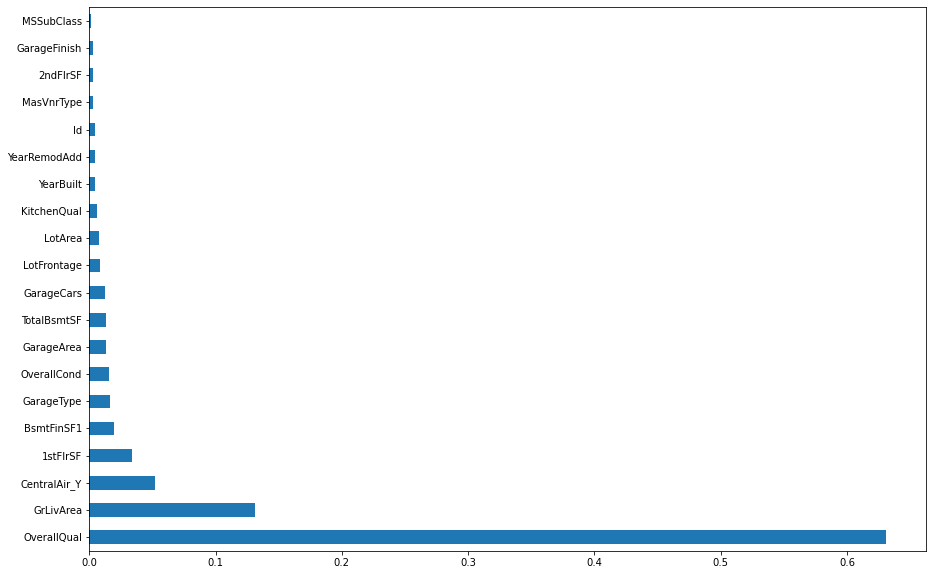

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
fig, ax = plt.subplots(figsize=(15,10))
tree_reg = DecisionTreeRegressor(max_depth=8, 
                             min_samples_split=2, 
                             min_samples_leaf=6)
tree_reg.fit(X_train, y_train)
importance = tree_reg.feature_importances_
feature_importances = pd.Series(importance, index= df_train.columns)
feature_importances.nlargest(20).plot(kind='barh');

In [58]:
# создаем список с новыми feature importances
feature_importances = ['OverallQual','GrLivArea','CentralAir_Y','1stFlrSF','BsmtFinSF1','GarageType','OverallCond',\
                       'GarageArea','TotalBsmtSF','GarageCars','LotFrontage','LotArea','KitchenQual','YearBuilt',\
                       'YearRemodAdd','BsmtFinType1','2ndFlrSF','GarageFinish','MSSubClass']


# CatBoostRegressor без  feature importances

In [59]:
from catboost import CatBoostRegressor
cb = CatBoostRegressor(iterations=683)

In [60]:
cb.fit(X_train, y_train, verbose=0, plot=True, eval_set=(X_valid, y_valid), )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [61]:
# делаем предсказание
cb.predict(df.iloc[1460:])

array([11.7468498 , 11.95772748, 12.12770149, ..., 11.97744681,
       11.68788587, 12.30587838])

In [62]:
# сохраняем полученный результат в csv файл
predict_test = np.exp(cb.predict(df.iloc[1460:]))
frame = pd.read_csv('sample_submission.csv', index_col='Id')
frame['SalePrice'] = predict_test
frame.to_csv('kaggle_pred1.csv')

In [63]:
# смотрим feature importances
feature_importances_cat = cb.feature_importances_

<AxesSubplot:>

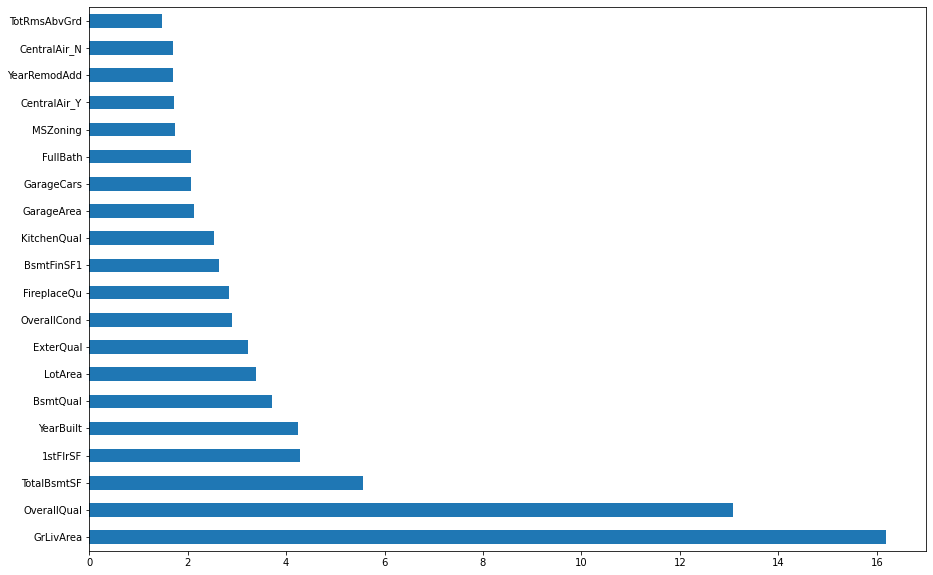

In [64]:
# визуализируем feature importances
fig, ax = plt.subplots(figsize=(15,10))
feature_importances_cat1 = pd.Series(feature_importances_cat, index= df_train.columns)
feature_importances_cat1.nlargest(20).plot(kind='barh')

## Создаем новый DataFrame по DecisionTreeRegressor.feature importances

In [65]:
new_df = df_train[feature_importances]
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(new_df, target, random_state=23, test_size=0.2)

## CatBoostRegressor c feature importances

In [66]:
# создаем экземпляр класса
cb1 = CatBoostRegressor(iterations=193)

In [67]:
# учим модель
cb1.fit(X_train1, y_train1, verbose=0, plot=True, eval_set=(X_valid1, y_valid1), )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [68]:
# делаем предсказание
cb1.predict(df.iloc[1460:])

array([11.74140653, 12.00270607, 12.10639855, ..., 11.98402574,
       11.78122449, 12.31846993])

In [76]:
# сохраняем полученный результат в csv файл
predict_test1 = np.exp(cb1.predict(df.iloc[1460:]))
frame = pd.read_csv('sample_submission.csv', index_col='Id')
frame['SalePrice'] = predict_test1
frame.to_csv('kaggle_pred2.csv')


#df.to_csv('/Users/mike/Desktop/main/Project/House_Price_pred.ipynb')
#MY_frame = pd.read_csv('/Users/mike/Desktop/main/Project/House_Price_pred.ipynb')
#MY_frame
# Push to kaggle!

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [70]:
import shap
model = CatBoostRegressor(iterations=300, learning_rate=0.1, random_seed=123)
model.fit(X_train1, y_train1, verbose=False, plot=False)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train1)

In [71]:
np.__version__
#pip install --upgrade numpy==1.22.0

'1.22.0'

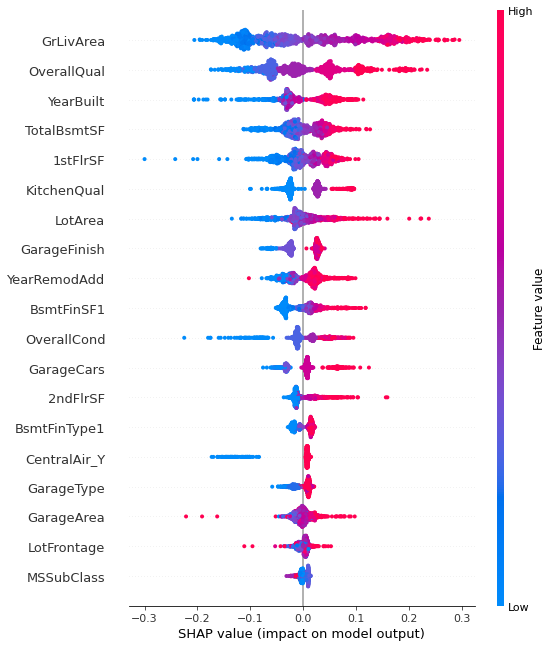

In [72]:
import shap
shap.summary_plot(shap_values, X_train1)